In [1]:
import random

import numpy as np
import tensorflow as tf
from PIL import Image

## The Data

To teach a computer what hand written digits look like we're gonna need some data:

In [2]:
data = tf.keras.datasets.mnist.load_data()

Next we're going to want to seperate our data in to training and testing datasets:

In [3]:
train, test = data
print(f'# of training examples: {len(train[0])}')
print(f'# of test examples: {len(test[0])}')

# of training examples: 60000
# of test examples: 10000


In [4]:
train_examples, train_labels = train
test_examples, test_labels = test

Okay so we know the shape of our data lets look at some examples

Example #40356
Associated Label: 6


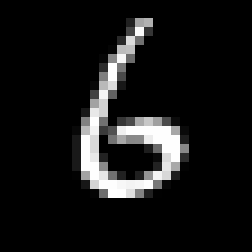

In [5]:
rand_idx = random.randint(0, len(train_examples)-1)
example = train_examples[rand_idx]
img = Image.fromarray(example, mode='L')
print(f'Example #{rand_idx}')
print(f'Associated Label: {train_labels[rand_idx]}')
img.resize((252, 252))

## Neural Network

To build a neural network we first need to design it's structure (input, hidden, and output layers)

In [6]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Adding an optimizer, loss function, and metrics to our network

In [7]:
nn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

We can also review the architecture of our model

In [8]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Now we're ready to train our model!

In [9]:
nn_model.fit(train_examples, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 72us/sample - loss: 2.7069 - accuracy: 0.8703
Epoch 2/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3761 - accuracy: 0.9154
Epoch 3/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2690 - accuracy: 0.9321
Epoch 4/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2383 - accuracy: 0.9392
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2162 - accuracy: 0.9431
Epoch 6/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2138 - accuracy: 0.9455
Epoch 7/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2074 - accuracy: 0.9477
Epoch 8/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1921 - accuracy: 0.9513
Epoch 9/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1850 - accuracy: 0.9539
Epoch 10/10
60

Now we can test our Neural Network model on the images we saved for testing purposes

In [10]:
test_loss, test_accuracy = nn_model.evaluate(test_examples, test_labels, verbose=2)
print(f'Test Accuracy: {test_accuracy}')

10000/1 - 0s - loss: 0.1831 - accuracy: 0.9515
Test Accuracy: 0.9514999985694885


We can also store the predictions for every image in the testing dataset

In [11]:
predictions = nn_model.predict(test_examples)
predicted_labels = np.argmax(predictions, axis=-1)
print('Raw:', predictions[0])
print('Argmax:', predicted_labels[0])

Raw: [4.7580062e-32 3.3792135e-24 2.0049589e-11 6.2999522e-22 1.5910532e-25
 4.0229463e-28 0.0000000e+00 1.0000000e+00 9.2413945e-32 8.3096092e-15]
Argmax: 7


Using our stored predictions we can look at our test examples and see what the model predicted

Example #7947
Predicted Label: 4
Confidence: 1.0


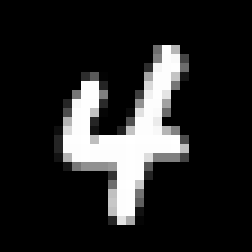

In [12]:
rand_idx = random.randint(0, len(test_examples)-1)
example = test_examples[rand_idx]
# while predicted_labels[rand_idx] == test_labels[rand_idx]:
#     rand_idx = random.randint(0, len(test_examples)-1)
print(f'Example #{rand_idx}')
print(f'Predicted Label: {predicted_labels[rand_idx]}')
print(f'Confidence: {predictions[rand_idx][predicted_labels[rand_idx]]}')
img = Image.fromarray(example, mode='L')
img.resize((252, 252))

## Convolutional Neural Network

To build a convolutional neural network we design the structure in the same way however this time we add convolutional layers instead of dense layers

In [13]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), (1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), (1, 1), padding='same', activation='relu'),
    tf.keras.layers.AvgPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

Adding an optimizer, loss function, and metrics to our network

In [14]:
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Again we can view the summary of our model

In [15]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                62730     
Total params: 72,298
Trainable params: 72,298
Non-trainable params: 0
_________________________________________________________________


Now we're ready to train our model!

In [16]:
reshaped_train = train_examples.reshape(*train_examples.shape, 1)
cnn_model.fit(reshaped_train, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.1548 - accuracy: 0.9597
Epoch 2/10
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.0563 - accuracy: 0.9824
Epoch 3/10
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.0402 - accuracy: 0.9871
Epoch 4/10
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.0295 - accuracy: 0.9907
Epoch 5/10
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.0232 - accuracy: 0.9924
Epoch 6/10
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.0207 - accuracy: 0.9934
Epoch 7/10
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.0173 - accuracy: 0.9946
Epoch 8/10
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.0172 - accuracy: 0.9948
Epoch 9/10
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.0114 - accuracy: 0.9966
Epoch 10/10
60

Now we can test our CNN model on the images we saved for testing purposes

In [17]:
reshaped_test = test_examples.reshape(*test_examples.shape, 1)
test_loss, test_accuracy = cnn_model.evaluate(reshaped_test, test_labels, verbose=2)
print(f'Test Accuracy: {test_accuracy}')

10000/1 - 2s - loss: 0.0471 - accuracy: 0.9824
Test Accuracy: 0.9824000000953674


Similar to the NN model we can store the CNN predictions for every image in the testing dataset

In [21]:
predictions = cnn_model.predict(tf.dtypes.cast(reshaped_test, dtype=tf.float32))
predicted_labels = np.argmax(predictions, axis=-1)

Using our stored predictions we can look at our test examples and see what the model predicted

Example #8246
Predicted Label: 5
Confidence: 0.9943258166313171


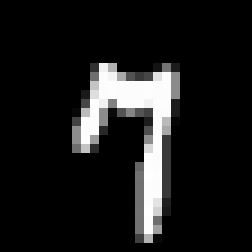

In [33]:
rand_idx = random.randint(0, len(test_examples)-1)
example = test_examples[rand_idx]
# while predicted_labels[rand_idx] == test_labels[rand_idx]:
#     rand_idx = random.randint(0, len(test_examples)-1)
print(f'Example #{rand_idx}')
print(f'Predicted Label: {predicted_labels[rand_idx]}')
print(f'Confidence: {predictions[rand_idx][predicted_labels[rand_idx]]}')
img = Image.fromarray(example, mode='L')
img.resize((252, 252))